In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.utils.data as dutils

In [4]:
device = 'cpu'
seed = 99

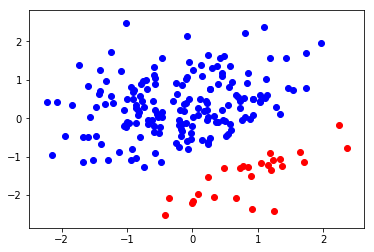

In [50]:
def getfake(samples, dimensions, epsilon):
    wfake = torch.randn(dimensions)   # fake weight vector for separation
    bfake = torch.randn(1)            # fake bias
    wfake = wfake / torch.norm(wfake)                 # rescale to unit length

    # making some linearly separable data, simply by chosing the labels accordingly
    X = torch.zeros(size=(samples, dimensions))
    Y = torch.zeros(samples)

    i = 0
    while (i < samples):
        tmp = torch.randn(dimensions)
        margin = torch.dot(tmp, wfake) + bfake
        if (torch.norm(tmp).item() < 3) & (abs(margin.item()) > epsilon):
            X[i,:] = tmp
            Y[i] = 1 if margin.item() > 0 else -1
            i += 1
    return X, Y

# plot the data with colors chosen according to the labels
def plotdata(X,Y):
    for (x,y) in zip(X,Y):
        if (y.item() == 1):
            plt.scatter(x[0].item(), x[1].item(), color='r')
        else:
            plt.scatter(x[0].item(), x[1].item(), color='b')

# plot contour plots on a [-3,3] x [-3,3] grid
def plotscore(w,d):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = torch.zeros(size=(xgrid.size, ygrid.size, 2))
    zz[:,:,0] = torch.from_numpy(xx)
    zz[:,:,1] = torch.from_numpy(yy)
    vv = torch.mm(zz,w) + d
    CS = plt.contour(xgrid,ygrid,vv.numpy())
    plt.clabel(CS, inline=1, fontsize=10)

X, Y = getfake(200, 2, 0.3)
plotdata(X,Y)
plt.show()

Encountered an error and updated parameters
data   [0.01253407 0.03344824], label -1.0
weight [-0.01253407 -0.03344824], bias  -1.0


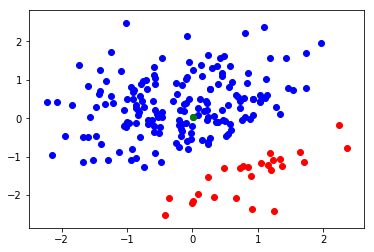

Encountered an error and updated parameters
data   [ 1.0507811 -1.1528107], label 1.0
weight [ 1.0382471 -1.1862589], bias  0.0


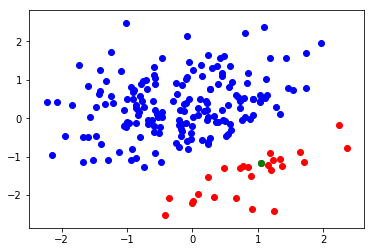

Encountered an error and updated parameters
data   [-0.17981632 -0.28384602], label -1.0
weight [ 1.2180635 -0.9024129], bias  -1.0


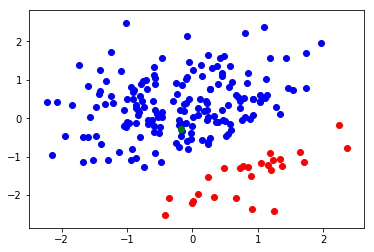

Encountered an error and updated parameters
data   [1.2790238  0.30264023], label -1.0
weight [-0.06096029 -1.2050531 ], bias  -2.0


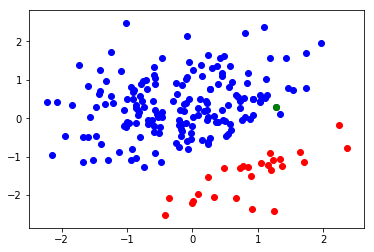

Encountered an error and updated parameters
data   [ 1.1582152 -1.2274984], label 1.0
weight [ 1.0972549 -2.4325514], bias  -1.0


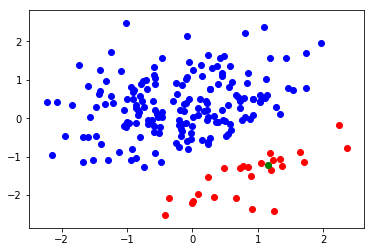

Encountered an error and updated parameters
data   [ 0.2357156 -0.61758  ], label -1.0
weight [ 0.86153924 -1.8149714 ], bias  -2.0


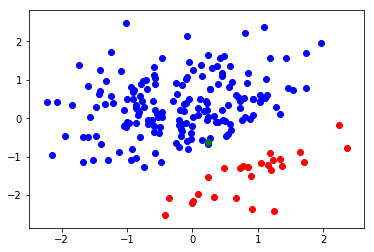

In [52]:
def perceptron(w,b,x,y):
    if (y * (torch.dot(w,x) + b)).item() <= 0:
        w += y * x
        b += y
        return 1
    else:
        return 0

w = torch.zeros(2)
b = torch.zeros(1)
for (x,y) in zip(X,Y):
    res = perceptron(w,b,x,y)
    if (res == 1):
        print('Encountered an error and updated parameters')
        print('data   {}, label {}'.format(x.numpy(),y.item()))
        print('weight {}, bias  {}'.format(w.numpy(),b.item()))
#         plotscore(w,b)
        plotdata(X,Y)
        plt.scatter(x[0].item(), x[1].item(), color='g')
        plt.show()